In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"furkanibilen","key":"7cac0cd7a1823a95e12e946d3b936cfa"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [00:46<00:00, 33.3MB/s]



In [9]:
! mkdir input

In [10]:
! unzip breast-histopathology-images.zip -d "/content/input/"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: /content/input/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: /content/input/IDC_r

In [11]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt

In [12]:
filepaths=[]
for name in glob('/content/input/IDC_regular_ps50_idx5/*',recursive=True):
    filepaths.append(name)
print(filepaths[:5])


['/content/input/IDC_regular_ps50_idx5/12897', '/content/input/IDC_regular_ps50_idx5/9083', '/content/input/IDC_regular_ps50_idx5/14188', '/content/input/IDC_regular_ps50_idx5/12881', '/content/input/IDC_regular_ps50_idx5/12750']


In [13]:
len(filepaths)

279

In [14]:
mp=filepaths[60:90]
imagePatches=[]
for i in mp:
    imagePatches+=glob(i+'/*/*.png', recursive=True)

In [15]:
print('total no. of images selected from total images is '+str(len(imagePatches)))
imagePatches[:5]

total no. of images selected from total images is 28069


['/content/input/IDC_regular_ps50_idx5/14305/0/14305_idx5_x501_y301_class0.png',
 '/content/input/IDC_regular_ps50_idx5/14305/0/14305_idx5_x451_y301_class0.png',
 '/content/input/IDC_regular_ps50_idx5/14305/0/14305_idx5_x1901_y1101_class0.png',
 '/content/input/IDC_regular_ps50_idx5/14305/0/14305_idx5_x651_y1001_class0.png',
 '/content/input/IDC_regular_ps50_idx5/14305/0/14305_idx5_x2301_y1051_class0.png']

In [16]:
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [17]:
print('Among them, '+str(len(class0))+' is clss0 and '+str(len(class1))+' is class1')

Among them, 20018 is clss0 and 8051 is class1


**Now Shuffling the images randomly**

In [18]:
sampled_class0 = random.sample(class0, len(class1))
sampled_class1 = random.sample(class1, len(class1))
len(sampled_class0)
class0=None;
class1=None;

In [19]:
import gc

**Now Reading all images into arrays**

In [20]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
      if i.endswith('.png'):
        img = cv2.imread(i ,cv2.IMREAD_COLOR)
        img_sized = cv2.resize(img, (227, 227), interpolation=cv2.INTER_LINEAR)
        img_arrays.append([img_sized, label])
    return img_arrays


In [ ]:
#Input size 227,227
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)
print('done for 227,277')

done for 227,277


In [21]:
#Input size 50,50
def get_image_arrays2(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i ,cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

In [22]:
#Input size 50,50
class0_array = get_image_arrays2(sampled_class0, 0)
class1_array = get_image_arrays2(sampled_class1, 1)
print('done for size 50,50')

done for size 50,50


In [23]:
gc.collect()

99

In [24]:
print(len(class0_array))
print(len(class1_array))

8051
8051


In [25]:
class0_array[0][0].shape

(50, 50, 3)

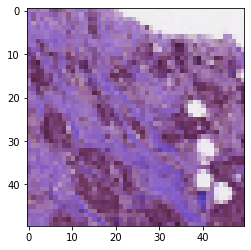

In [26]:
plt.imshow(class1_array[1][0])

In [27]:
combined_data = np.concatenate((class0_array, class1_array))



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [28]:
combined_data[0][0].shape

(50, 50, 3)

In [29]:
len(combined_data)

16102

**Now splitting the features and labels from the combined data**

In [30]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X[0])
#print(y[0])

In [31]:
print(len(X))
print(len(y))

16102
16102


In [ ]:
#Input shape 227,227
X = np.array(X).reshape(-1, 227, 227, 3)

In [32]:
#Input shape 50,50
X = np.array(X).reshape(-1, 50, 50, 3)

In [33]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

#test_ids, dev_ids = train_test_split(y_test, test_size=0.5, random_state=0)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("X_train Shape:",X_train.shape,"X_test Shape:",X_test.shape,"y_train Shape:",y_train.shape,"y_test Shape:",y_test.shape)

X_train Shape: (12076, 50, 50, 3) X_test Shape: (4026, 50, 50, 3) y_train Shape: (12076, 2) y_test Shape: (4026, 2)


In [34]:
class0_array=None
class1_array=None
combined_data=None
y=None
X=None
gc.collect()

110

In [37]:

#Input shape 50,50
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)        

In [38]:
#Input shape 50,50
epochs = 50  
batch_size = 250

In [39]:
#Input shape 50,50
historyCustomInput = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= epochs,
    verbose = 2,
    batch_size=batch_size
    )

Epoch 1/50
49/49 - 11s - loss: 5.6246 - accuracy: 0.5668 - val_loss: 0.6836 - val_accuracy: 0.5589 - 11s/epoch - 218ms/step
Epoch 2/50
49/49 - 1s - loss: 0.6171 - accuracy: 0.7166 - val_loss: 0.6550 - val_accuracy: 0.6505 - 935ms/epoch - 19ms/step
Epoch 3/50
49/49 - 1s - loss: 0.5753 - accuracy: 0.7529 - val_loss: 0.6071 - val_accuracy: 0.7072 - 962ms/epoch - 20ms/step
Epoch 4/50
49/49 - 1s - loss: 0.5385 - accuracy: 0.7772 - val_loss: 0.6143 - val_accuracy: 0.6706 - 927ms/epoch - 19ms/step
Epoch 5/50
49/49 - 1s - loss: 0.5098 - accuracy: 0.7847 - val_loss: 0.5865 - val_accuracy: 0.6927 - 928ms/epoch - 19ms/step
Epoch 6/50
49/49 - 1s - loss: 0.4909 - accuracy: 0.7935 - val_loss: 0.5641 - val_accuracy: 0.6980 - 923ms/epoch - 19ms/step
Epoch 7/50
49/49 - 1s - loss: 0.4634 - accuracy: 0.8039 - val_loss: 0.5894 - val_accuracy: 0.6659 - 956ms/epoch - 20ms/step
Epoch 8/50
49/49 - 1s - loss: 0.4658 - accuracy: 0.7960 - val_loss: 0.5097 - val_accuracy: 0.7454 - 956ms/epoch - 20ms/step
Epoch 9/

In [ ]:
#VGG16 Mimarisi
from keras.applications.vgg16 import VGG16
#load model
modelVGG16 = VGG16(classes=2,input_shape=(227,227,3),weights=None,classifier_activation="sigmoid")
modelVGG16.summary()

In [ ]:
from keras.applications.densenet import DenseNet201
modelDensenet = DenseNet201(classes=2,input_shape=(227,227,3),weights=None)
modelDensenet.summary()

In [ ]:
from keras.applications.mobilenet import MobileNet
modelmobil=MobileNet(classes=2,input_shape=(227,227,3),weights=None,classifier_activation="sigmoid",dropout=0.001)
modelmobil.summary()

In [ ]:
#ResNet50 Mimarisi
from keras.applications.resnet import ResNet50
#load model
modelResnet50 = ResNet50(classes=2,classifier_activation="sigmoid",weights=None,input_shape=(227,227,3))
modelResnet50.summary()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#AlexNet Mimarisi
modelAlexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(9216,input_shape=(12544,), activation='relu'),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
#Alexnet
modelAlexnet.summary()

In [ ]:
#Alexnet
modelAlexnet.compile(
    optimizer=tf.optimizers.Adam(lr=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#VGG16
modelVGG16.compile(
    optimizer=tf.optimizers.Adam(lr=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Resnet50
modelResnet50.compile(
    optimizer=tf.optimizers.Adam(lr=0.000001),
    loss='binary_crossentropy',
    metrics=['accuracy','Recall',]
)

In [ ]:
X_train.shape

(11400, 227, 227, 3)

In [ ]:
historyAlexnet=modelAlexnet.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=10)

In [ ]:
historyVGG16=modelVGG16.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=10)

Epoch 1/10
  8/357 [..............................] - ETA: 5:21:24 - loss: 0.7047 - accuracy: 0.4492 - recall: 0.4336

In [ ]:
historyResnet50=modelResnet50.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=10)

In [40]:
e=model.evaluate(X_test,y_test)

126/126 [==============================] - 1s 4ms/step - loss: 0.4023 - accuracy: 0.8246


In [41]:
import matplotlib.pyplot as plt

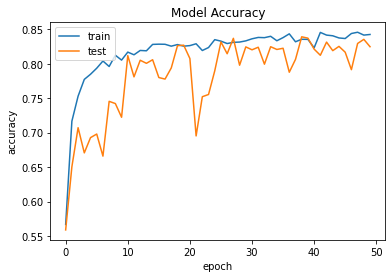

In [42]:
#Input shape 50,50
plt.plot(historyCustomInput.history['accuracy'])
plt.plot(historyCustomInput.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

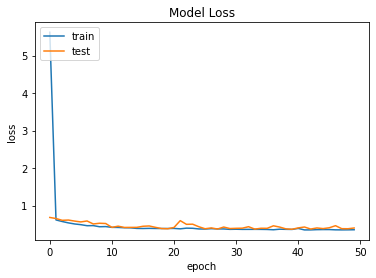

In [43]:
#plotting the loss of test and training sets for Input Shape 50,50
plt.plot(historyCustomInput.history['loss'])
plt.plot(historyCustomInput.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

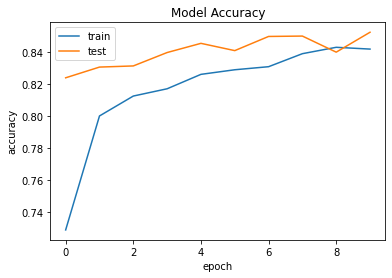

In [ ]:
#plotting the Accuracy of test and training sets for Alexnet
plt.plot(historyAlexnet.history['accuracy'])
plt.plot(historyAlexnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#plotting the Accuracy of test and training sets for VGG16
plt.plot(historyVGG16.history['accuracy'])
plt.plot(historyVGG16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

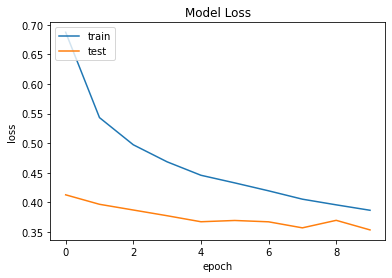

In [ ]:
#plotting the loss of test and training sets for Alexnet
plt.plot(historyAlexnet.history['loss'])
plt.plot(historyAlexnet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#plotting the loss of test and training sets for VGG16
plt.plot(historyVGG16.history['loss'])
plt.plot(historyVGG16.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#model save for Alexnet
modelAlexnet.save('alexnet.h5')

In [ ]:
#model save for VGG16
modelVGG16.save('VGG16.h5')

In [ ]:
#model save for Input Shape 50,50
model.save('CustomShape.h5')

In [44]:
#prediction for CustomInput Shape 50,50
y_predCustomInput=model.predict(X_test)

In [ ]:
#prediction for Alexnet
y_predAlexnet=modelAlexnet.predict(X_test)

In [ ]:
#prediction for VGG16
y_predVGG16=modelVGG16.predict(X_test)

In [45]:
#print("AlexNet Prediction:",y_predAlexnet[21])
#print("VGG16 Prediction:",y_predVGG16[21])
print("CustomInput Prediction:",y_predCustomInput[21])

CustomInput Prediction: [0.74561536 0.25615767]


In [46]:
y_test[21]

array([1., 0.], dtype=float32)

0 means 1,0
1 means 0,1

In [47]:
#Custom Input Shape 50,50
Y_predCustomInput=[]
for i in y_predCustomInput:
    if i[0]>i[1]:
        Y_predCustomInput.append(0)
    else:
        Y_predCustomInput.append(1)

In [ ]:
#Alexnet
Y_predAlexnet=[]
for i in y_predAlexnet:
    if i[0]>i[1]:
        Y_predAlexnet.append(0)
    else:
        Y_predAlexnet.append(1)

In [ ]:
#VGG16
Y_predVGG16=[]
for i in y_predVGG16:
    if i[0]>i[1]:
        Y_predVGG16.append(0)
    else:
        Y_predVGG16.append(1)

In [48]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)

In [ ]:
print("Y_pred Alexnet:",Y_predAlexnet[0])
print("Y_pred VGG16:",Y_predVGG16[0])
print("Y_pred CustomInput:",Y_predCustomInput[0])

1

In [ ]:
Y_test[0]

1

In [49]:
#Custom Input Shape Scores
from sklearn.metrics import classification_report, confusion_matrix
print('Custom Input Shape Confusion Matrix')
print(confusion_matrix(Y_test, Y_predCustomInput))
print('Custom Input Shape Classification Report')
print(classification_report(Y_test, Y_predCustomInput, target_names=['Class-0','Class-1']))

Custom Input Shape Confusion Matrix
[[1595  462]
 [ 244 1725]]
Custom Input Shape Classification Report
              precision    recall  f1-score   support

     Class-0       0.87      0.78      0.82      2057
     Class-1       0.79      0.88      0.83      1969

    accuracy                           0.82      4026
   macro avg       0.83      0.83      0.82      4026
weighted avg       0.83      0.82      0.82      4026



In [ ]:
#Alexnet Scores
from sklearn.metrics import classification_report, confusion_matrix
print('Alexnet Confusion Matrix')
print(confusion_matrix(Y_test, Y_predAlexnet))
print('Alexnet Classification Report')
print(classification_report(Y_test, Y_predAlexnet, target_names=['Class-0','Class-1']))

Confusion Matrix
[[1759  360]
 [ 256 1798]]
Classification Report
              precision    recall  f1-score   support

     Class-0       0.87      0.83      0.85      2119
     Class-1       0.83      0.88      0.85      2054

    accuracy                           0.85      4173
   macro avg       0.85      0.85      0.85      4173
weighted avg       0.85      0.85      0.85      4173



In [ ]:
#VGG16 Scores
from sklearn.metrics import classification_report, confusion_matrix
print('VGG16 Confusion Matrix')
print(confusion_matrix(Y_test, Y_predVGG16))
print('VGG16 Classification Report')
print(classification_report(Y_test, Y_predVGG16, target_names=['Class-0','Class-1']))

In [51]:
#Custom Input Shape 50,50
classes=[0,1]
con_mat_df_CustomInput = pd.DataFrame(confusion_matrix(Y_test, Y_predCustomInput),
                     index = classes, 
                     columns = classes)

In [ ]:
#Alexnet
classes=[0,1]
con_mat_df_Alexnet = pd.DataFrame(confusion_matrix(Y_test, Y_predAlexnet),
                     index = classes, 
                     columns = classes)

In [ ]:
#VGG16
classes=[0,1]
con_mat_df_VGG16 = pd.DataFrame(confusion_matrix(Y_test, Y_predVGG16),
                     index = classes, 
                     columns = classes)

In [52]:
con_mat_df_CustomInput

,0,1
0,1595,462
1,244,1725


In [ ]:
con_mat_df_Alexnet

,0,1
0,1759,360
1,256,1798


In [ ]:
con_mat_df_VGG16

In [53]:
import seaborn as sns

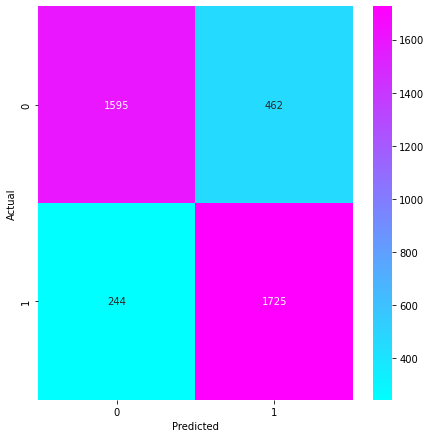

In [54]:
#Custom Input Shape
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df_CustomInput, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

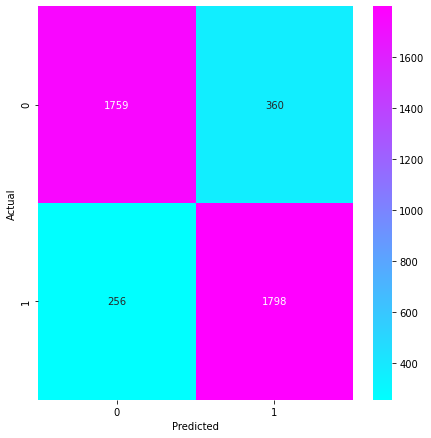

In [ ]:
#Alexnet
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df_Alexnet, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#VGG16
figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df_VGG16, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()